In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Test.csv")

In [155]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


In [156]:
df = df.drop(['Name', 'Unnamed: 0'], axis=1)

In [157]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

In [158]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Mileage    1
Engine     6
Power      6
Seats      7
dtype: int64


In [160]:
df['Mileage'] = df['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['Engine'] = df['Engine'].astype(str).str.replace(" CC", "").astype(float)
df['Power'] = df['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)

In [161]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Seats'] = df['Seats'].fillna(df['Seats'].median())

In [162]:
df_new = pd.get_dummies(df[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)

In [163]:
feat = pd.concat([df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']], df_new], axis=1)

In [164]:
tar = df['Price']

In [165]:
feat

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2013,84175,23.40,1248.0,74.00,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2013,60000,20.36,1197.0,78.90,5.0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2013,71000,22.70,1582.0,126.20,5.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1246,2005,91000,16.80,1341.0,83.00,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1247,2017,50534,17.21,1197.0,103.50,5.0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1248,2012,83000,19.08,1582.0,126.32,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [166]:
tar

0        6.95
1        2.90
2        6.28
3       13.80
4        2.75
        ...  
1245     6.80
1246     0.80
1247     8.27
1248     6.00
1249     9.51
Name: Price, Length: 1250, dtype: float64

In [167]:
feat = (feat - feat.mean()) / feat.std()

In [168]:
x = feat.values
y = tar.values.reshape(-1, 1)

In [169]:
x = np.hstack([np.ones((x.shape[0], 1)), x])

In [170]:
theta = np.random.randn(x.shape[1], 1)

In [172]:
iterations = 1000
alpha = 0.01

In [173]:
def computecost(x, y, theta):
    m = len(y)
    predict = x.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predict - y))
    return cost

In [174]:
def gradientdescent(x, y, theta, alpha, iterations):
    m = len(y)
    cost = []
    for i in range(iterations):
        gradients = (1 / m) * x.T.dot(x.dot(theta) - y)
        theta -= alpha * gradients
        cost.append(computecost(x, y, theta))
    return theta, cost

In [175]:
theta_new, cost = gradientdescent(x, y, theta, alpha, iterations)

In [176]:
theta_new, cost[-1]

(array([[ 9.7718887 ],
        [ 3.68405535],
        [ 0.62737824],
        [-0.9473489 ],
        [ 1.93292849],
        [ 4.82574529],
        [-1.35553228],
        [ 0.16915128],
        [-1.15596295],
        [-1.56164085],
        [ 0.04408179],
        [-0.35145078],
        [ 0.35560625],
        [ 0.50524195],
        [ 0.29328822],
        [ 0.51431126],
        [-0.07339852],
        [ 0.35076179],
        [ 0.14518055],
        [-0.31438907],
        [-0.26268815],
        [-0.21176323],
        [ 0.01781263]]),
 np.float64(18.53867302757497))

In [177]:
def predict(x, theta):
    pred=np.dot(x,theta)
    return pred

In [178]:
print(tar.shape, theta_new.shape)

(1250,) (23, 1)


In [179]:
pred_cost=predict(x,theta)
pred_cost

array([[ 4.44525648],
       [ 4.65164246],
       [ 6.00572612],
       ...,
       [14.59383606],
       [12.7326457 ],
       [11.11816301]])

In [180]:
pred_cost = pred_cost.reshape(-1)

In [181]:
print(tar.shape)
print(pred_cost.shape)

(1250,)
(1250,)


In [182]:
def rmse(tar,pred_cost):
    rss=np.sum((tar-pred_cost)**2)
    tss=np.sum((tar-pred_cost.mean())**2)
    return 1-rss/tss
outrmse=rmse(tar, pred_cost)
outrmse

np.float64(0.7009377350128324)

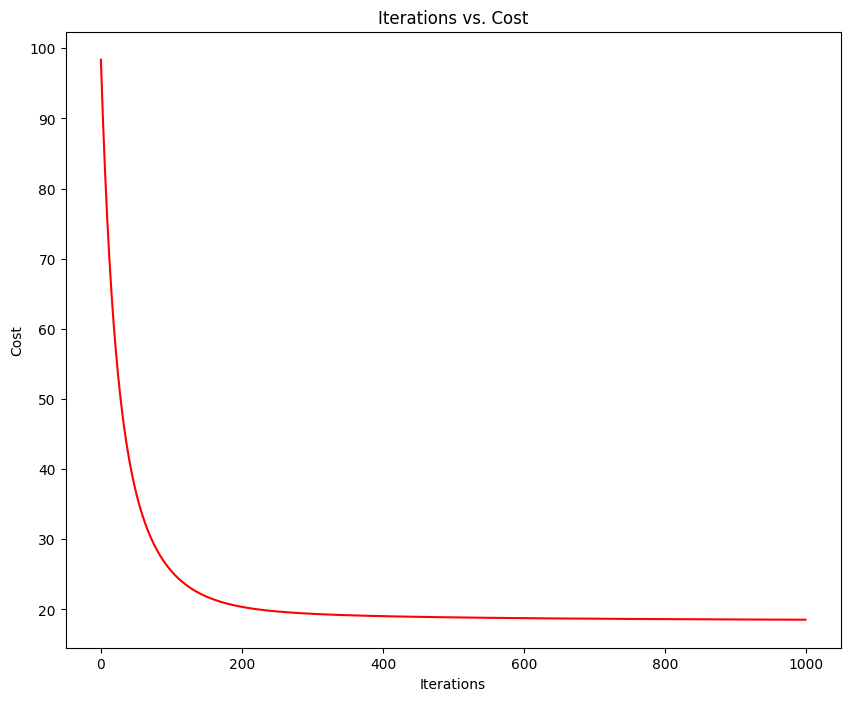

In [183]:
fig_1, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()